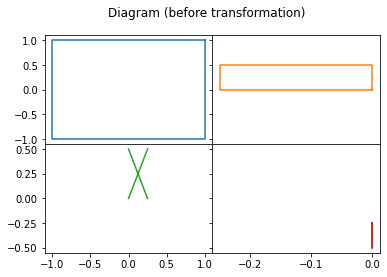

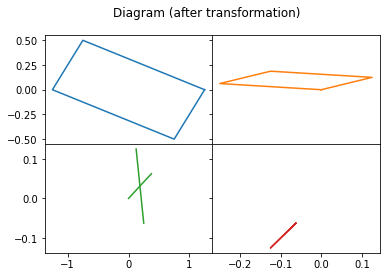

In [55]:
#import details
import numpy as np
import matplotlib.pyplot as plt

#function for matrix multiplication
def matrixMultiply (X, Y):
    newX = []
    newY = []
    for i in range(len(X)):
        newX.append((b*X[i]+Y[i])/b)
        newY.append((Y[i]-X[i])/b)
    return newX, newY
  
#constants
a = 1
b = 4

#first part coords
x1 = [a,a,-a,-a,a]
y1 = [a,-a,-a,a,a]

#second part coords
x2 = [1-a,-a/4,-a/4,1-a,1-a]
y2 = [a-1,a-1,a/2,a/2,a-1]

#third part coords (a)
x3a = [a/4,a-1]
y3a = [a-1,a/2]

#third part coords (b)
x3b = [a-1,a/4]
y3b = [a-1,a/2]

#fourth part coords
x4 = [a-1,a-1,1-a,1-a]
y4 = [-a/4,-a/2,-a/2,-a/4]

#creating axis
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
(ax1, ax2), (ax3, ax4) = axs
fig.suptitle('Diagram (before transformation)')
#plotting points
ax1.plot(x1, y1)
ax2.plot(x2, y2, 'tab:orange')
ax3.plot(x3a, y3a, 'tab:green')
ax3.plot(x3b, y3b, 'tab:green')
ax4.plot(x4, y4, 'tab:red')

for ax in axs.flat:
    ax.label_outer()

#matrix transformation calculations
x1,y1 = matrixMultiply(x1,y1)
x2,y2 = matrixMultiply(x2,y2)
x3a,y3a = matrixMultiply(x3a,y3a)
x3b,y3b = matrixMultiply(x3b,y3b)
x4,y4 = matrixMultiply(x4,y4)

#replotting after transform
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
(ax1, ax2), (ax3, ax4) = axs
fig.suptitle('Diagram (after transformation)')
ax1.plot(x1, y1)
ax2.plot(x2, y2, 'tab:orange')
ax3.plot(x3a, y3a, 'tab:green')
ax3.plot(x3b, y3b, 'tab:green')
ax4.plot(x4, y4, 'tab:red')

for ax in axs.flat:
    ax.label_outer()

# Results explanation
#
# We can see that the set of points in each part have undergone a transformation defined by the matrix A.
#
# Each parts seems to have undergone an enlargement of 1/4 in the y, a horizontal shear with magnitude 1/4 and a vertical shear with magnitude -1/4
#
# This is evident through the change of appearance across the two diagrams (before and after transformation). 
#
# One alternative is that the sets of points underwent a rotation, enlargement and a shear, however I did not calculate by what degree. 
#
#
#
#
#
#

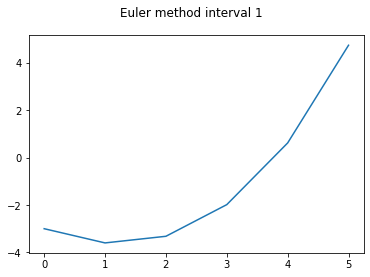

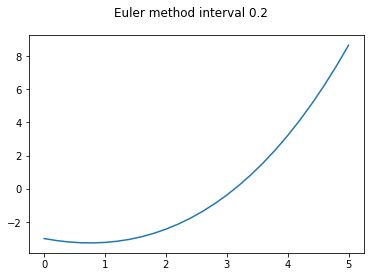

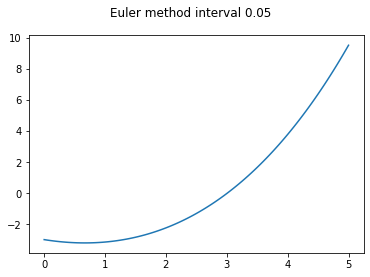

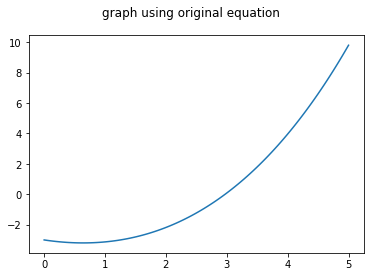

In [52]:
#import details
import numpy as np
import matplotlib.pyplot as plt

#function to calc arrays with x and y positions using Eulers method
def eulersMethod(stepSize,startPointer,finishPointer, xStart, yStart):
    #lists used to store x and y values
    xValues = [xStart]
    yValues = [yStart]
    #iterates through increasing x by step size and calculating y from avialable resources
    for i in range (int((finishPointer-startPointer)/stepSize)):
        xValues.append(startPointer+((i+1)*stepSize))  #increment x
        yValues.append(yValues[i] + stepSize*(xValues[i]+yValues[i]/5))  #calc y using Eulers method
    return xValues, yValues

#function used to graph the derived mathematical function
def graphIt(formula, start, finish):  
    x = np.linspace(start, finish, num = 100)
    y = eval(formula)
    fig4, ax4 = plt.subplots()
    fig4.suptitle('graph using original equation')
    ax4.plot(x, y)  


#calls eulers method
X1,Y1 = eulersMethod(1,0,5,0,-3)
X2,Y2 = eulersMethod(0.2,0,5,0,-3)
X3,Y3 = eulersMethod(0.05,0,5,0,-3)

#creating axis and plotting points
fig1, ax1 = plt.subplots()
ax1.plot(X1,Y1)
fig1.suptitle('Euler method interval 1')

fig2, ax2 = plt.subplots()
ax2.plot(X2,Y2)
fig2.suptitle('Euler method interval 0.2')

fig3, ax3 = plt.subplots()
ax3.plot(X3,Y3)
fig3.suptitle('Euler method interval 0.05')

#create a graph using the original formula.
graphIt("-5*x-25+22*np.exp(x/5)",0,5)

# Explain results
# From our results we can see that as the step size decreases, the accuracy of our set of points (acquired from Eulers method) increases, to the point where the graphs become indistinguishable.
# This proves the effectivity of Eulers method.
#
#
#
#
# Determining original function
# We want the function   dy/dx = x + y/5   in the form   dy/dx + P(x)y = Q(x)
# => dy/dx - y/5 = x
# The integrating factor is defined by   IF = e^(∫P(x).dx)  which we can see is e^(-x/5)
# Multiplying each term in the original equation by the IF we get:
# (dy/dx)*(e^(-x/5)) - (y/5)*(e^(-x/5)) = x*(e^(-x/5))
# By using the product rule we can deduce that:
# d/dx(y*e^(-x/5)) = x*e^(-x/5)
# 
# We can now see that
# y*e^(-x/5) = ∫x*e^(-x/5).dx
# Which can be solved using integration by parts as follows
# Let u = x, u' = 1, v = -5e^(-x/5), v' = e^(-x/5)
# Since ∫uv' = uv - ∫u'v
# y*e^(-x/5) = -5xe^(-x/5) - ∫ 1 * -5e^(-x/5)
# y*e^(-x/5) = -5xe^(-x/5) - 25e^(-x/5) + ce^(x/5)
# Divide through by integrating factor
# y = -5x -25 + ce^(x/5)
# Since we are given y(0) = -3 we can deduct that c = 22
# Therefore:
# y = - 5x - 25 + 22e^(x/5) 